# Dataset Features Visualization

In [1]:
# Author: Matus Remen (xremen01@stud.fit.vutbr.cz)
# Date: 2025-05-08
# Description: Dataset features visualization

"""
Dataset sample:
172.16.251.202|-|-|1746906902982|GET|/index.html|?page=4|HTTP/1.1|200|100396|-|Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:138.0) Gecko/20100101 Firefox/138.0|406|100684|101090|+|0|2232|-|0
172.23.68.42|-|-|1746906904426|GET|/index.html|?page=22|HTTP/1.1|200|100396|-|Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36|504|100684|101188|+|0|6856|-|0
172.17.241.128|-|-|1746906905826|GET|/index.html|?page=40|HTTP/1.1|200|100396|-|Mozilla/5.0 (X11; Linux x86_64; rv:138.0) Gecko/20100101 Firefox/138.0|408|100684|101092|+|0|5451|-|0
172.20.184.201|-|-|1746906907218|GET|/index.html|?page=30|HTTP/1.1|200|100396|-|Mozilla/5.0 (X11; Linux x86_64; rv:138.0) Gecko/20100101 Firefox/138.0|408|100684|101092|+|0|5391|-|0
172.16.251.202|-|-|1746906907992|GET|/item.html|?itemId=496666|HTTP/1.1|200|10103|http://localhost:8080/index.html?page=4|Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:138.0) Gecko/20100101 Firefox/138.0|462|10389|10851|+|0|5469|-|0

Apache HTTP server log format:
%{X-Forwarded-For}i|%l|%u|%{msec}t|%m|%U|%q|%H|%>s|%b|%{Referer}i|%{User-Agent}i|%I|%O|%S|%X|%k|%D|%L|%{X-Label}i
"""

import numpy as np
import pandas as pd

# Parse logs into DataFrame
columns = ["ip", "logname", "user", "timestamp", "method", "path", "query", 
           "protocol", "status", "response_size", "referer", "user_agent", "bytes_received",
           "bytes_sent", "bytes_transferred", "connection_status", "keepalive_count",
           "processing_time", "error_log_id", "label"]

df = pd.DataFrame(
    np.genfromtxt("../dataset/test1_access.log", delimiter="|", dtype=str, encoding="utf-8"),
    columns=columns
)
df = df[df["label"] != "-"]
df.describe()

,ip,logname,user,timestamp,method,path,query,protocol,status,response_size,referer,user_agent,bytes_received,bytes_sent,bytes_transferred,connection_status,keepalive_count,processing_time,error_log_id,label
count,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013
unique,45424,1,1,67618,1,2,69008,1,3,4,33775,12,387,7,446,2,6,51952,1,2
top,172.19.108.254,-,-,1747221766267,GET,/index.html,?page=41,HTTP/1.1,200,100396,-,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:138...,471,100684,10860,+,0,14436,-,0
freq,69,86013,86013,17,86013,52035,301,86013,80806,46828,5913,7378,1924,45517,1920,80805,78352,12,86013,47082


In [2]:
# Delete columns - logname, user, method, protocol, error_log_id
df = df.drop(['logname', 'user', 'method', 'protocol', 'error_log_id'], axis=1)
df.describe()

,ip,timestamp,path,query,status,response_size,referer,user_agent,bytes_received,bytes_sent,bytes_transferred,connection_status,keepalive_count,processing_time,label
count,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013,86013
unique,45424,67618,2,69008,3,4,33775,12,387,7,446,2,6,51952,2
top,172.19.108.254,1747221766267,/index.html,?page=41,200,100396,-,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:138...,471,100684,10860,+,0,14436,0
freq,69,17,52035,301,80806,46828,5913,7378,1924,45517,1920,80805,78352,12,47082


In [3]:
# Make timestamp, response_size, bytes_received, bytes_sent, bytes_transferred, processing time numeric
df["timestamp"] = pd.to_numeric(df["timestamp"])
df['response_size'] = pd.to_numeric(df['response_size'])
df['bytes_received'] = pd.to_numeric(df['bytes_received'])
df['bytes_sent'] = pd.to_numeric(df['bytes_sent'])
df['bytes_transferred'] = pd.to_numeric(df['bytes_transferred'])
df['processing_time'] = pd.to_numeric(df['processing_time'])
df.describe()


,timestamp,response_size,bytes_received,bytes_sent,bytes_transferred,processing_time
count,8.601300e+04,86013.000000,86013.000000,86013.000000,86013.000000,8.601300e+04
mean,1.747223e+12,58662.950182,486.070571,58943.756455,59429.827026,1.239592e+06
std,1.175360e+06,45678.269166,101.017261,45687.258422,45659.760117,4.809066e+06
min,1.747221e+12,221.000000,189.000000,405.000000,595.000000,1.675000e+03
25%,1.747222e+12,10103.000000,423.000000,10389.000000,10917.000000,1.439700e+04
50%,1.747224e+12,100396.000000,470.000000,100684.000000,101074.000000,2.308600e+04
75%,1.747224e+12,100396.000000,555.000000,100684.000000,101126.000000,6.022400e+04
max,1.747225e+12,100396.000000,778.000000,100684.000000,101456.000000,2.173727e+07


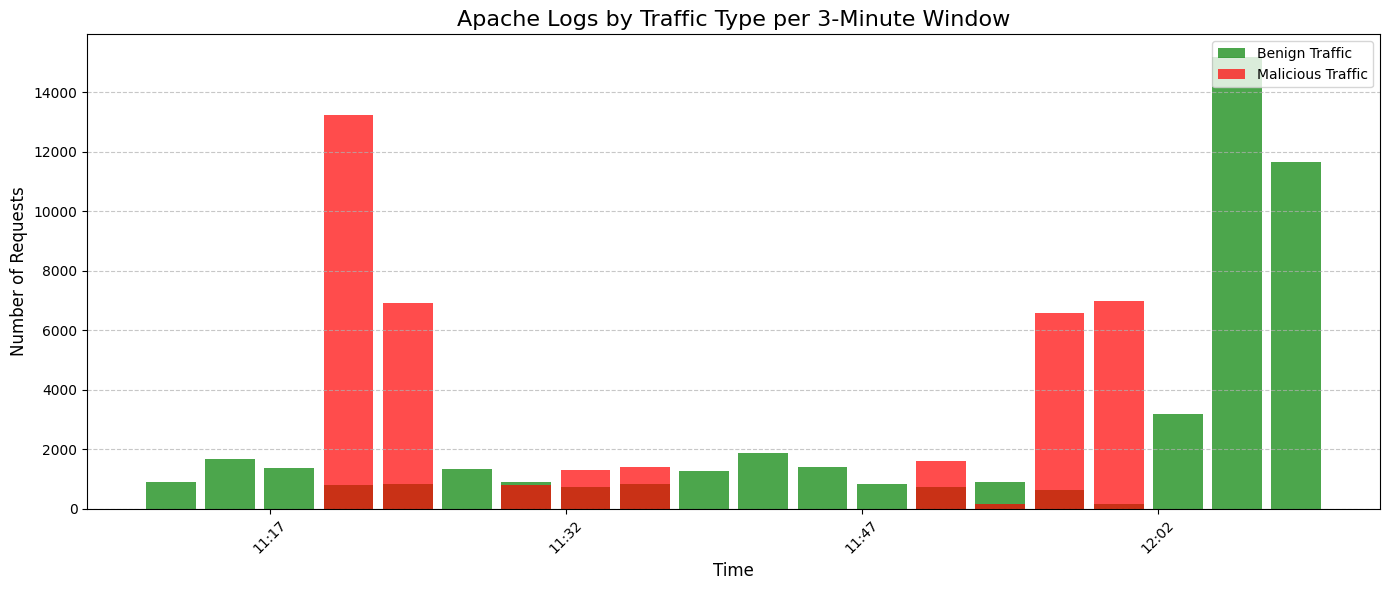

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['timestamp'] = pd.to_numeric(df['timestamp'])
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Create 3-minute time bins
df['time_window'] = df['datetime'].dt.floor('3min')

# Group by time window and label (0 for benign, 1 for malicious)
logs_by_type = df.groupby(['time_window', 'label']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
width = 0.00175
plt.bar(logs_by_type.index, logs_by_type['0'], width=width, 
        color='green', label='Benign Traffic', alpha=0.7)
plt.bar(logs_by_type.index, logs_by_type['1'], width=width, 
        color='red', label='Malicious Traffic', alpha=0.7)

# Format the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
plt.title('Apache Logs by Traffic Type per 3-Minute Window', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
del logs_by_type

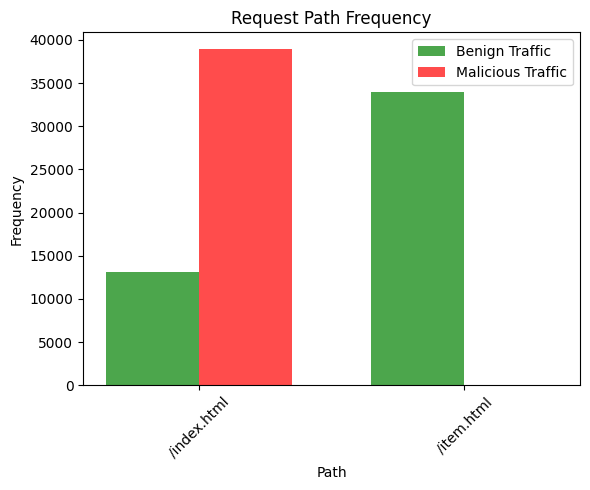

In [5]:
# Histogram of paths
logs_by_path = df.groupby(["path", "label"]).size().unstack(fill_value=0)

plt.figure(figsize=(6, 5))
bar_width = 0.35

# Set positions for the bars
x = np.arange(len(logs_by_path.index))

# Create the bars side by side
plt.bar(x - bar_width/2, logs_by_path['0'], width=bar_width, 
        color='green', label='Benign Traffic', alpha=0.7)
plt.bar(x + bar_width/2, logs_by_path['1'], width=bar_width, 
        color='red', label='Malicious Traffic', alpha=0.7)

plt.xlabel('Path')
plt.ylabel('Frequency')
plt.title('Request Path Frequency')
plt.xticks(x, logs_by_path.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

del logs_by_path

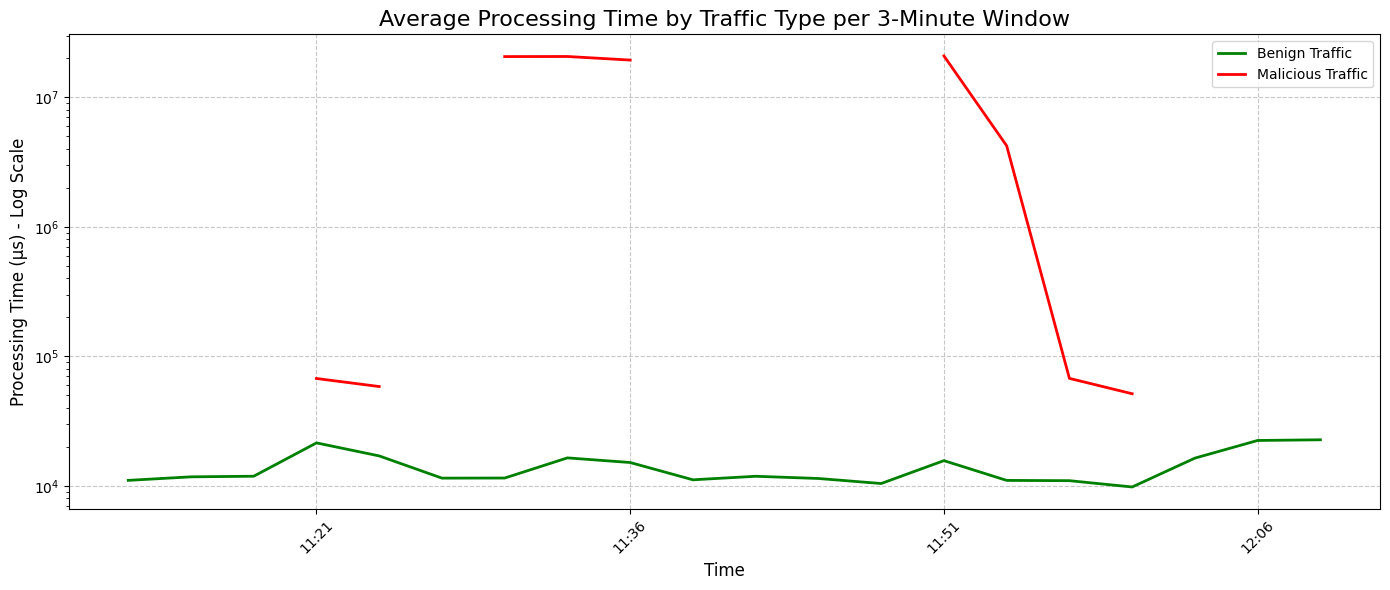

In [6]:
# Average processing_time over 3 minute time windows per label
df['time_window'] = pd.to_datetime(df['timestamp'], unit='ms').dt.floor('3min')
processing_time_by_type = df.groupby(['time_window', 'label'])['processing_time'].mean().unstack()

plt.figure(figsize=(14, 6))

plt.plot(processing_time_by_type.index, processing_time_by_type['0'], 
         color='green', label='Benign Traffic', linewidth=2)
plt.plot(processing_time_by_type.index, processing_time_by_type['1'], 
         color='red', label='Malicious Traffic', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Average Processing Time by Traffic Type per 3-Minute Window', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Processing Time (μs) - Log Scale', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

del processing_time_by_type


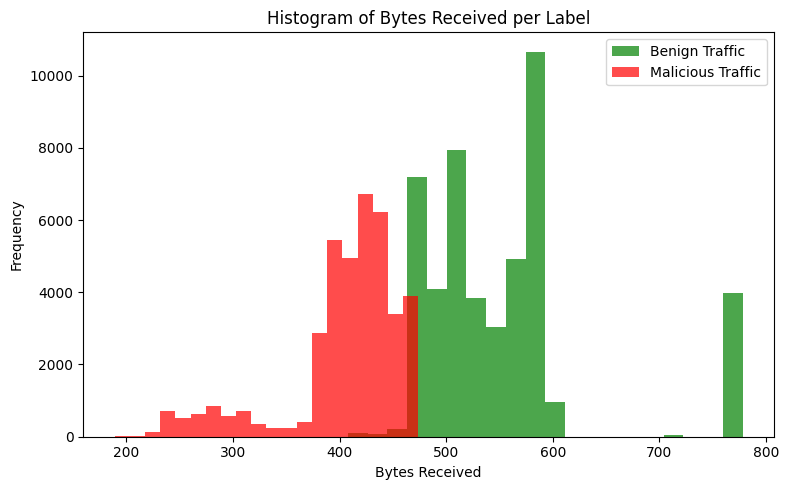

In [7]:
# Histogram of bytes_received per label
plt.figure(figsize=(8, 5))

# Create histograms for each label
plt.hist(df[df['label'] == "0"]['bytes_received'], bins=20, alpha=0.7, label='Benign Traffic', color='green')
plt.hist(df[df['label'] == "1"]['bytes_received'], bins=20, alpha=0.7, label='Malicious Traffic', color='red')

plt.xlabel('Bytes Received')
plt.ylabel('Frequency')
plt.title('Histogram of Bytes Received per Label')
plt.legend()

plt.tight_layout()
plt.show()

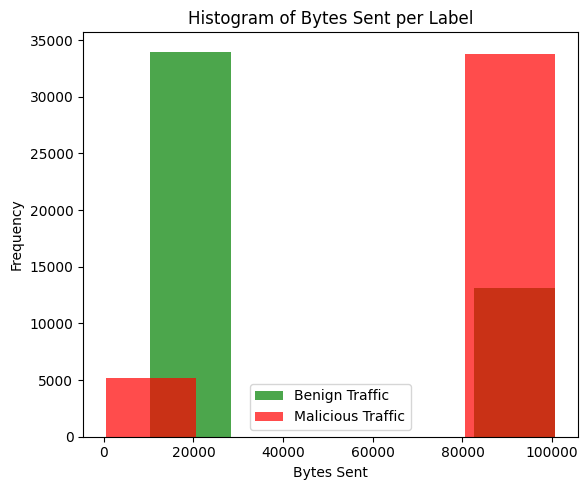

In [8]:
# Histogram of bytes_sent per label
plt.figure(figsize=(6, 5))

# Create histograms for each label
plt.hist(df[df['label'] == "0"]['bytes_sent'], bins=5, alpha=0.7, label='Benign Traffic', color='green')
plt.hist(df[df['label'] == "1"]['bytes_sent'], bins=5, alpha=0.7, label='Malicious Traffic', color='red')

plt.xlabel('Bytes Sent')
plt.ylabel('Frequency')
plt.title('Histogram of Bytes Sent per Label')
plt.legend()

plt.tight_layout()
plt.show()

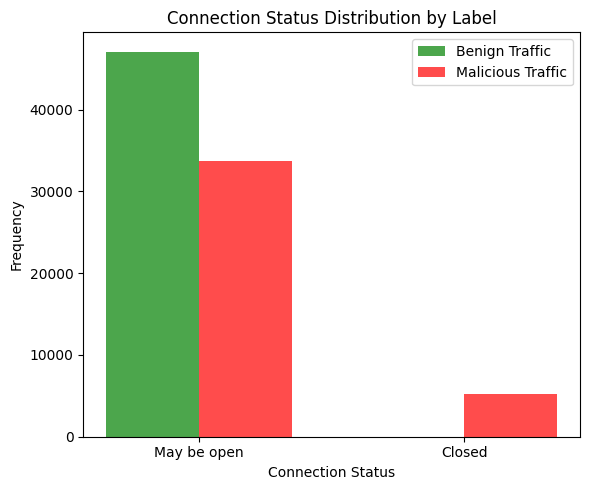

In [9]:
# Histogram of connection_status per label
logs_by_connection_status = df.groupby(["connection_status", "label"]).size().unstack(fill_value=0)

plt.figure(figsize=(6, 5))
bar_width = 0.35

# Set positions for the bars
x = np.arange(len(logs_by_connection_status.index))

# Create the bars side by side
plt.bar(x - bar_width/2, logs_by_connection_status['0'], width=bar_width, 
        color='green', label='Benign Traffic', alpha=0.7)
plt.bar(x + bar_width/2, logs_by_connection_status['1'], width=bar_width, 
        color='red', label='Malicious Traffic', alpha=0.7)

plt.xlabel('Connection Status')
plt.ylabel('Frequency')
plt.title('Connection Status Distribution by Label')
plt.xticks(x, ["May be open", "Closed"])
plt.legend()

plt.tight_layout()
plt.show()

del logs_by_connection_status